### Analise de Dados Delivery
Analise de um dataset de um aplicativo de Delivery.

 1. Importação do dataset

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import openpyxl as pxl
import locale

df = pd.read_excel('qlt_delivery.xlsx')
display(df.head())

,ID,Salario,Idade,Faixa-Etaria,Dias-Cliente,Estado_Civil,Formação,Criancas-Casa,Adolescentes-Casa,Recencia,...,Qtde-Peixes,Qtde-Doces,Qtde-Premium,Qtde-Compras,Qtde-Compras-Web,Qtde-Compras-Catalogo,Qtde-Compras-Loja,Visitas-Site-Mes,Reclamacoes,Gasto-Cliente
0,1,58138,63,61-70,2822,Single,Graducacao,0,0,58,...,172,88,88,3,8,10,4,7,0,1529
1,2,46344,66,61-70,2272,Single,Graducacao,1,1,38,...,2,1,6,2,1,1,2,5,0,21
2,3,71613,55,51-60,2471,Together,Graducacao,0,0,26,...,111,21,42,1,8,2,10,4,0,734
3,4,26646,36,31-40,2298,Together,Graducacao,1,0,26,...,10,3,5,2,2,0,4,6,0,48
4,5,58293,39,31-40,2320,Married,Doutorado,1,0,94,...,46,27,15,5,5,3,6,5,0,407


In [52]:
# ============================
# 1.
# Clientes abaixo dos 30 anos gastam mais do que outras faixas etárias?
# ============================
# Criar coluna categórica ao invés de booleana
df["Faixa_Idade"] = df["Idade"].apply(lambda x: "<30 Anos" if x < 30 else "≥30 Anos")

# Calcular gasto médio por faixa etária
gasto_por_idade = df.groupby("Faixa_Idade")["Gasto-Cliente"].mean().reset_index()

# Exibir resultado formatado em R$
print("Gasto médio por faixa etária (em BRL):")
for _, row in gasto_por_idade.iterrows():
    print(f"{row['Faixa_Idade']}: R$ {row['Gasto-Cliente']:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))


Gasto médio por faixa etária (em BRL):
<30 Anos: R$ 860,37
≥30 Anos: R$ 556,85


In [70]:
# ============================
# 2.
# Clientes solteiros gastam menos que outros segmentos?
# ============================
df["Estado_civil"] = df["Estado_Civil"].replace({
    "Single": "Solteiro",
    "Married": "Casado",
    "Divorced": "Divorciado",
    "Widow": "Viúvo",
    "Together": "Juntos"
})

# Recalcular gasto médio por Estado Civil após renomear
gasto_por_estado_civil = df.groupby("Estado_civil")["Gasto-Cliente"].mean().reset_index()

print("Gasto médio por Estado Civil (em BRL):")
for _, row in gasto_por_estado_civil.iterrows():
    print(f"{row['Estado_civil']}: R$ {row['Gasto-Cliente']:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

Gasto médio por Estado Civil (em BRL):
Casado: R$ 546,65
Divorciado: R$ 569,05
Juntos: R$ 564,35
Solteiro: R$ 569,27
Viúvo: R$ 672,11


In [54]:
# ============================
# 3.
# Solteiros abaixo dos 30 gastam mais?
# ============================
filtro_solteiros = (df["Estado_Civil"] == "Single") & (df["Idade"] < 30)
gasto_solteiros_jovens = df.loc[filtro_solteiros, "Gasto-Cliente"].mean()
gasto_outros = df.loc[~filtro_solteiros, "Gasto-Cliente"].mean()

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

print(f"\nGasto médio solteiros <30: {locale.currency(gasto_solteiros_jovens, grouping=True, symbol=True)}")
print(f"Gasto médio outros clientes: {locale.currency(gasto_outros, grouping=True, symbol=True)}")


Gasto médio solteiros <30: R$ 1.005,12
Gasto médio outros clientes: R$ 557,49


In [ ]:
# ============================
# 4.
# Clientes com crianças em casa compram mais?
# ============================
df["Total_Criancas"] = df["Criancas-Casa"] + df["Adolescentes-Casa"]
df["Tem_Filhos"] = df["Total_Criancas"] > 0

compras_filhos = df.groupby("Tem_Filhos")["Qtde-Compras"].mean()

# Exibe a média de compras de forma personalizada
print(f"Clientes Sem Filhos realizam {compras_filhos[False]:.2f} compras, em média.")
print(f"Clientes Com Filhos realizam {compras_filhos[True]:.2f} compras, em média.")

Clientes Sem Filhos realizam 1.13 compras, em média.
Clientes Com Filhos realizam 2.79 compras, em média.


In [56]:
# ============================
# 5.
# Clientes que compram mais carne também compram mais vinho?
# ============================
correlacao = df["Qtde-Carnes"].corr(df["Qtde-Vinhos"])
print(f"\nCorrelação entre carnes e vinhos: {correlacao:.2f}")


Correlação entre carnes e vinhos: 0.59


In [ ]:
# ============================
# 6.
# Consumo médio de frutas por faixa etária
# ============================

consumo_frutas_por_idade = df.groupby('Faixa-Etaria')['Qtde-Frutas'].mean().reset_index()

ordem_faixas = sorted(df['Faixa-Etaria'].unique())
consumo_frutas_por_idade['Faixa-Etaria'] = pd.Categorical(consumo_frutas_por_idade['Faixa-Etaria'], categories=ordem_faixas, ordered=True)
consumo_frutas_por_idade = consumo_frutas_por_idade.sort_values('Faixa-Etaria')


print("\nConsumo médio de frutas por faixa etária:")
display(consumo_frutas_por_idade)



Consumo médio de frutas por faixa etária:


,Faixa-Etaria,Qtde-Frutas
0,21-30,38.688525
1,31-40,26.921569
2,41-50,23.662999
3,51-60,26.296813
4,61-70,26.788079
5,71-80,35.323810



Em resumo, o gráfico sugere que clientes que têm um alto gasto com carne, geralmente também gastam mais com vinho...


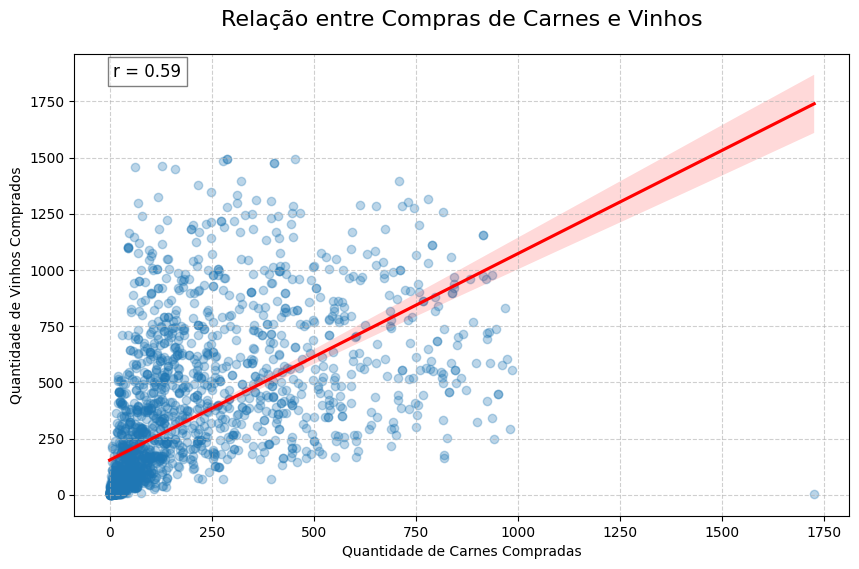

In [ ]:
# Gráfico de correlação entre carnes e vinhos

plt.figure(figsize=(10, 6))

# Usamos o `regplot` do seaborn, que plota o gráfico de dispersão e a linha de regressão
ax = sns.regplot(
    data=df,
    x="Qtde-Carnes",
    y="Qtde-Vinhos",
    scatter_kws={'alpha':0.3}, # Adiciona transparência aos pontos
    line_kws={'color':'red'}    # Define a cor da linha de regressão
)
# Adiciona o valor da correlação no gráfico
ax.text(
    x=0.05, y=0.95,
    s=f'r = {correlacao:.2f}',
    transform=ax.transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.5)
)

# Títulos e rótulos
plt.title('Relação entre Compras de Carnes e Vinhos', fontsize=16, pad=20)
plt.xlabel('Quantidade de Carnes Compradas')
plt.ylabel('Quantidade de Vinhos Comprados')
plt.grid(True, linestyle='--', alpha=0.6)

print("\nEm resumo, o gráfico sugere que clientes que têm um alto gasto com carne, geralmente também gastam mais com vinho...")
plt.show()


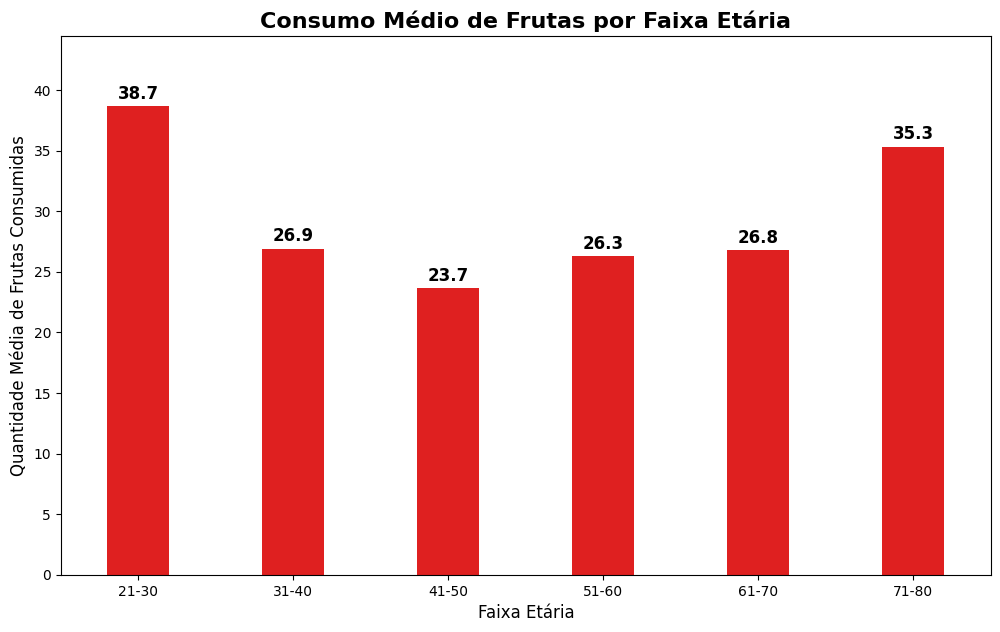

In [81]:
# Gráfico de barras do consumo médio de frutas por faixa etária

plt.figure(figsize=(12, 7))

# Criando o gráfico de barras com o seaborn
ax = sns.barplot(
    data=consumo_frutas_por_idade,
    x='Faixa-Etaria',
    y='Qtde-Frutas',
    color='red'
)

# Ajustando a espessura das barras
espessura_barra = 0.5

# Loop para alterar a espessura de cada barra individualmente
for p in ax.patches:
    largura_original = p.get_width()

    nova_largura = largura_original * espessura_barra

    diff = largura_original - nova_largura

    p.set_x(p.get_x() + diff / 2.)

    p.set_width(nova_largura)


# Adicionar os valores exatos (rótulos) sobre cada barra
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=12,
                fontweight='bold')

# Títulos e rótulos aos eixos
plt.title('Consumo Médio de Frutas por Faixa Etária', fontsize=16, fontweight='bold')
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Quantidade Média de Frutas Consumidas', fontsize=12)
plt.xticks(rotation=0)

# Ajuste do limite eixo Y para dar um espaço extra no topo
plt.ylim(0, consumo_frutas_por_idade['Qtde-Frutas'].max() * 1.15)

# Mostra o gráfico final
plt.show()